In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv("train.csv")

In [3]:
mydata.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


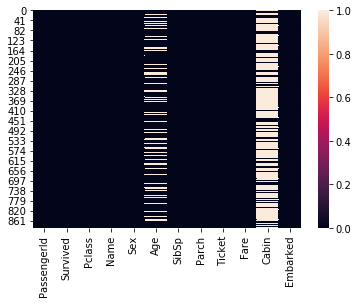

In [4]:
sns.heatmap(mydata.isnull())

In [5]:
mean_of_age=mydata["Age"].mean()

In [6]:
Age_coloumn=mydata["Age"]


In [7]:
for i ,j in enumerate(Age_coloumn.isnull()):
    if (j==True):
        mydata["Age"][i]=mean_of_age


C:\Users\joraw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
mydata.drop(axis=1 , labels="Cabin",inplace=True)

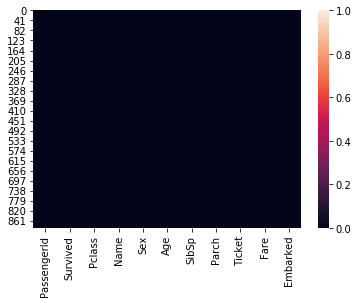

In [9]:
sns.heatmap(mydata.isnull())

In [10]:
mydata.drop(labels= ["Name" , "Ticket"] ,axis =1,inplace=True)

In [18]:
mydata=mydata.join(pd.get_dummies(mydata["Sex"]).drop(["female"],axis=1),)

In [24]:
mydata= mydata.join(pd.get_dummies(mydata["Embarked"]).drop("C" ,axis=1))

In [29]:
mydata=mydata.drop(labels=["Age","Sex" ,"Embarked" ,"PassengerId"] , axis=1)

In [31]:
mydata.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,0,3,1,0,7.2500,1,0,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,0,0,1
3,1,1,1,0,53.1000,0,0,1
4,0,3,0,0,8.0500,1,0,1


In [36]:
y=mydata["Survived"]
X = mydata.drop(labels="Survived" ,axis=1)


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log_modal=LogisticRegression()

In [60]:
yo=log_modal.fit(X_train ,y_train)

C:\Users\joraw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
output=yo.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test ,output))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

   micro avg       0.79      0.79      0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [ ]:
log_modal.